<a href="https://colab.research.google.com/github/jatin-3049/Ecommerce-Sales-Performance-Analysis/blob/main/Trader_Behavior_Insights_Fear_Greed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Objective
Analyze the relationship between Bitcoin market sentiment (Fear & Greed Index) and trader performance using Hyperliquid historical trading data.


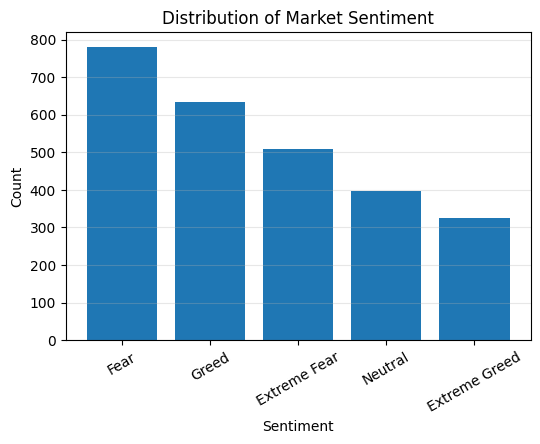

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fear_greed_df = pd.read_csv('fear_greed_index.csv')
trades_df = pd.read_csv('historical_data.csv')
label_counts = fear_greed_df['classification'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(label_counts.index, label_counts.values)
plt.xticks(rotation=30)
plt.grid(axis='y', alpha=0.3)
plt.title('Distribution of Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:

#converting dates

fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
trades_df['trade_datetime'] = pd.to_datetime(
    trades_df['Timestamp IST'],
    format='%d-%m-%Y %H:%M'
)
trades_df['trade_date'] = trades_df['trade_datetime'].dt.date
fear_greed_df['date'] = fear_greed_df['date'].dt.date

# Merging

merged_df = trades_df.merge(
    fear_greed_df[['date','value','classification']],
    left_on='trade_date',
    right_on='date',
    how='left'
    )



### Feature Engineering
We create sentiment categories, profit/loss flags, and trade size indicators to analyze trader behavior under different market conditions.


In [ ]:
def sentiment_group(x):
  x_str = str(x) # Convert x to string to handle non-string types like NaN
  if 'Fear' in x_str:
    return 'Fear'
  elif 'Greed' in x_str:
    return 'Greed'
  else:
    return 'Neutral'

merged_df['sentiment_type'] = merged_df['classification'].apply(sentiment_group)

merged_df['PnL_Flag'] = merged_df['Closed PnL'].apply(lambda x: 'Profit' if x > 0 else 'Loss')

merged_df['Trade_size_usd'] = merged_df['Size USD']



### Core Analysis
This section explores how trader performance and behavior vary across different market sentiment regimes.


In [ ]:
merged_df.groupby('sentiment_type')['Closed PnL'].mean()

,Closed PnL
sentiment_type,
Fear,49.212077
Greed,53.882281
Neutral,35.429074


Trade Frequency vs Sentiment


In [ ]:
merged_df['sentiment_type'].value_counts()


,count
sentiment_type,
Greed,90295
Fear,83237
Neutral,37692


Buy / Sell Behavior

In [ ]:
pd.crosstab(
    merged_df['sentiment_type'],
    merged_df['Side'],
    normalize='index'
)

Side,BUY,SELL
sentiment_type,,
Fear,0.495032,0.504968
Greed,0.470857,0.529143
Neutral,0.503422,0.496578


4 Risk (Trade Size) vs Sentiment

In [ ]:
merged_df.groupby('sentiment_type')['Trade_size_usd'].mean()


,Trade_size_usd
sentiment_type,
Fear,7182.011019
Greed,4574.424490
Neutral,4784.323781


Top vs Bottom Traders

In [ ]:
trader_perf = merged_df.groupby('Account')['Closed PnL'].sum()
top_traders = trader_perf.quantile(0.8)
bottom_traders = trader_perf.quantile(0.2)

merged_df['Trader_Category'] = merged_df['Account'].apply(
    lambda x: 'Top' if trader_perf[x] >= top_traders
    else ('Bottom' if trader_perf[x] <= bottom_traders else 'Mid'))

### Trader Performance Segmentation
Traders are categorized into Top, Mid, and Bottom performers based on cumulative PnL.


In [ ]:
merged_df.groupby(['Trader_Category', 'sentiment_type'])['Closed PnL'].mean()


Trader_Category  sentiment_type
Bottom           Fear               11.799499
                 Greed            -147.162567
                 Neutral            21.153896
Mid              Fear               47.233885
                 Greed              33.084543
                 Neutral            12.404985
Top              Fear               60.855156
                 Greed             116.888201
                 Neutral            55.736776
Name: Closed PnL, dtype: float64

### Conclusion

This analysis demonstrates that market sentiment significantly influences trader behavior and profitability.
Top-performing traders remain consistently profitable across Fear, Neutral, and Greed phases, with peak performance during Greed periods.
In contrast, bottom-performing traders incur substantial losses during Greed, indicating overconfidence and poor risk management.
These findings highlight the importance of sentiment-aware trading strategies and risk controls in crypto markets.
